Pour fitting une fonction polynomiale

In [1]:
#!pip install influxdb
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from influxdb import InfluxDBClient

In [2]:
stime='2017-01-27 08:00:00.000'
ftime='2017-01-27 10:00:00.000'

In [3]:
client = InfluxDBClient('apolline.lille.inria.fr', '8086', 'Apolline', 'PC2A', 'apolline')
results = client.query('select * from "events.stats.rasp8" where time >\'%s\' and time <\'%s\';'%(stime,ftime))
points = list(results.get_points())

In [4]:
x=[]
y=[]
def readData():
    for i in range(len(points)):
        x.append(i)
        y.append(points[i]['CO2'])
    return x,y

Mean Squared Error

In [5]:
def rmse(y_test, y):
    return sp.sqrt(sp.mean((y_test - y) ** 2))

Comparer avec la moyenne, entre [0-1]. 1 représente une prédiction parfaite.

In [6]:
def R2(y_test, y_true):
    return 1 - ((y_test - y_true)**2).sum() / ((y_true - y_true.mean())**2).sum()

Une autre façon de comparer.

In [7]:
def R22(y_test, y_true):
    y_mean = np.array(y_true)
    y_mean[:] = y_mean.mean()
    return 1 - rmse(y_test, y_true) / rmse(y_mean, y_true)

"degree" est l'index polynomiale. "coef_" est les coefficients polynomiaux. La phrase commenté  est utilisée pour comparer l'erreur.

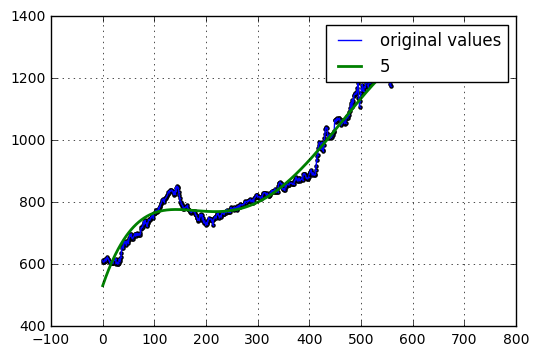

[531.55430955485383, 4.8881800014625503, -0.034369527520055718, 0.00010091981248657912, -1.150891653627778e-07, 4.2586378867781605e-11]


In [8]:
x,y=readData()
x=np.array(x)
y=np.array(y,dtype=np.float64)
plt.plot(x, y)
plt.scatter(x, y, s=5)
degree = [5]
y_test = []
y_test = np.array(y_test)
u=[]
for d in degree:
    
    clf = Pipeline([('poly', PolynomialFeatures(degree=d)),
                    ('linear', LinearRegression(fit_intercept=False))])
    '''
    clf = Pipeline([('poly', PolynomialFeatures(degree=d)),
                    ('linear', linear_model.Ridge ())])
    '''
    clf.fit(x[:, np.newaxis],y)
    y_test = clf.predict(x[:, np.newaxis])

    u.extend(clf.named_steps['linear'].coef_)
    #print('rmse=%.2f, R2=%.2f, R22=%.2f, clf.score=%.2f' %(rmse(y_test, y),R2(y_test, y),R22(y_test, y),clf.score(x[:, np.newaxis], y)))    
    
    plt.plot(x, y_test, linewidth=2)

plt.grid()
plt.legend(['original values',degree[0]], loc='upper right')
plt.show()
print(u)

Pour différentes périodes de temps, il est nécessitant des tests multiples, il faut changer la valeur "degree" pour trouver le bon polynôme. Les coefficients du polynôme sont les caractéristiquedes de données.